# TP2 Chaînes de caractères, dictionnaires et ensembles

## 1. Opérations de base sur les ensembles

1. Donnez dans $E1$ les éléments qui composent l'ensemble des parties de $\{1,2,3\}$

In [3]:
from sympy import *
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()

E1 = list(FiniteSet(1,2,3).powerset())
E1.sort()
E1

2. Calculez la liste de la somme des éléments de chaque sous-ensemble de $E1$

In [4]:
[sum(el) for el in E1]

3. Construisez $A$, le sous ensemble de $E1$ qui contient les éléments dont la somme des éléments est inférieure ou égale à 3.

In [5]:
a = {el for el in E1 if sum(el)<=3}
A = FiniteSet(*list(a))
A

4. Construisez $B$, l'ensemble des éléments de $E1$ de cardinalité paire

In [6]:
b = {el for el in E1 if len(el)%2==0}
B = FiniteSet(*list(b))
B

5. Donnez les élements de l'union, de l'intersection, de la différence et de la différence symétrique de $A$ et $B$. Le cas échéant, faites attention au type des résultats.

In [7]:
print(A.union(B),
A.intersection(B),
A-B, sep='\n')

{EmptySet(), {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}}
{EmptySet(), {1, 2}}
{{1}, {2}, {3}}


6. Calculez le produit cartésien de $A\times B$

In [8]:
list(A*B)

## 2. Calcul de la bijection de $N^2\rightarrow N$

1. La fonction $f(x,y)=y+(x+y)(x+y+1)/2$ permet de construire une bijection de $N^2\rightarrow N$. Affichez-en les 121 premières valeurs (11 valeurs par ligne). On considérera la création d'une matrice par la fonction `f` (à 2 variables). Regardez la documentation sur la création de matrices.

In [9]:
x,y = symbols('x y')
f = lambda x,y : int(y + (x+y)*(x+y+1)*(1/2))
f(1,3)

In [10]:
Matrix(11,11,f)

⎡0   2   5   9   14   20   27   35   44   54   65 ⎤
⎢                                                 ⎥
⎢1   4   8   13  19   26   34   43   53   64   76 ⎥
⎢                                                 ⎥
⎢3   7   12  18  25   33   42   52   63   75   88 ⎥
⎢                                                 ⎥
⎢6   11  17  24  32   41   51   62   74   87   101⎥
⎢                                                 ⎥
⎢10  16  23  31  40   50   61   73   86   100  115⎥
⎢                                                 ⎥
⎢15  22  30  39  49   60   72   85   99   114  130⎥
⎢                                                 ⎥
⎢21  29  38  48  59   71   84   98   113  129  146⎥
⎢                                                 ⎥
⎢28  37  47  58  70   83   97   112  128  145  163⎥
⎢                                                 ⎥
⎢36  46  57  69  82   96   111  127  144  162  181⎥
⎢                                                 ⎥
⎢45  56  68  81  95   110  126  143  161  180  200⎥
⎢           

2. Affichez (par `plot3d`) les valeurs de la fonction `f` pour $0≤x≤10$ et $0≤y≤10$. Attention ! La fonction `plot3d` doit être explicitement importée de `sympy.plotting`

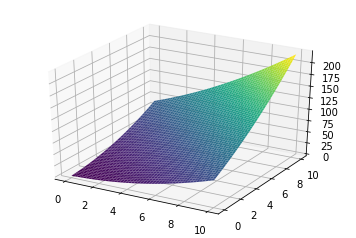

In [11]:
plot3d(y + (x+y)*(x+y+1)*(1/2), (x, 0, 10), (y, 0, 10))

3. Montrez grâce à `SymPy` que la fonction $f(x,y)$ ci-dessus est identique au polynôme de Cantor $g(x,y)=(3x+y+(x+y)^2)/2$. Considérez un changement de variable sur $g$ et développez les deux polynômes.

In [12]:
g = (3*x+y+(x+y)**2)/2
print((y + (x+y)*(x+y+1)*(1/2)).expand(),
g.expand(), sep = '\n')

0.5*x**2 + 1.0*x*y + 0.5*x + 0.5*y**2 + 1.5*y
x**2/2 + x*y + 3*x/2 + y**2/2 + y/2


## 3. Exercice sur les chaînes et les dictionnaires

1. Ecrivez une fonction qui prend en entrée une chaîne de caractères, qui efface les espaces (s'il y en a) et qui retourne la chaîne de caractères privée de ses espaces. On considérera la méthode `replace()`.

In [13]:
def efface(s) : return s.replace(' ', '')
efface("c est un exemple")

'cestunexemple'

2. Ecrivez une fonction `occurrences()` qui prend en entrée une chaîne de caractères et retourne  le nombre d'occurrences des lettres de l'alphabet {a,...,z} dans un dictionnaire.

In [14]:
def occurrences(s):
    return {chr(c):s.count(chr(c)) for c in range(ord('a'),ord('z')+1)}
val=occurrences(efface("c est un exemple"))
val

{'a': 0,
 'b': 0,
 'c': 1,
 'd': 0,
 'e': 4,
 'f': 0,
 'g': 0,
 'h': 0,
 'i': 0,
 'j': 0,
 'k': 0,
 'l': 1,
 'm': 1,
 'n': 1,
 'o': 0,
 'p': 1,
 'q': 0,
 'r': 0,
 's': 1,
 't': 1,
 'u': 1,
 'v': 0,
 'w': 0,
 'x': 1,
 'y': 0,
 'z': 0}

3. Transformez le dictionnaire obtenu précédemment pour que les valeurs soient exprimées selon un pourcentage

In [15]:
somme = sum(val.values())
val_100 = {c:round(val[c]*100/somme,2) for c in val}
val_100

{'a': 0.0,
 'b': 0.0,
 'c': 7.69,
 'd': 0.0,
 'e': 30.77,
 'f': 0.0,
 'g': 0.0,
 'h': 0.0,
 'i': 0.0,
 'j': 0.0,
 'k': 0.0,
 'l': 7.69,
 'm': 7.69,
 'n': 7.69,
 'o': 0.0,
 'p': 7.69,
 'q': 0.0,
 'r': 0.0,
 's': 7.69,
 't': 7.69,
 'u': 7.69,
 'v': 0.0,
 'w': 0.0,
 'x': 7.69,
 'y': 0.0,
 'z': 0.0}

4. Affichez l'histogramme des fréquences des lettres

<BarContainer object of 26 artists>

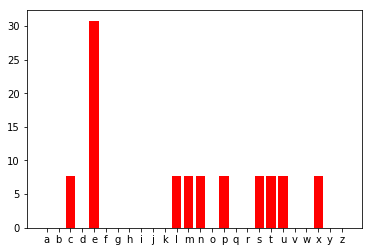

In [16]:
plt.bar(list(val_100.keys()),val_100.values(),color='r')

5. Écrire une fonction qui chiffre (et déchiffre) en utilisant le chiffre de César (décalage des lettres de $k$ positions vers la droite modulo 26). On supposera que le texte est écrit sur l'alphabet {a,..,z} sans caractères accentués (ou on le nettoiera en utilisant la fonction du cours) et dans lequel les espaces ont été retirés.

In [17]:
def cesar(m,k) :
    m = efface(m)
    alphaB = [chr(i) for i in range(ord('a'),ord('z')+1)]
    s = ''
    for c in m :
        index = alphaB.index(c)
        s = s + alphaB[(index+k)%26]
    return s
    
    
    
crypt=cesar("un bel exemple",3)
crypt

'xqehohahpsoh'

In [18]:
clair=cesar(crypt,-3)
clair

'unbelexemple'

6. Affichez l'histogramme des fréquences des lettres du texte clair puis du texte chiffré par le chiffre de César.

<BarContainer object of 26 artists>

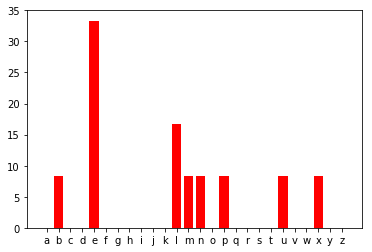

In [19]:
def histogramme(s) :
    val = occurrences(s)
    somme = sum(val.values())
    val_100 = {c:round(val[c]*100/somme,2) for c in val}
    val_100
    return plt.bar(list(val_100.keys()),val_100.values(),color='r')
histogramme(clair)

<BarContainer object of 26 artists>

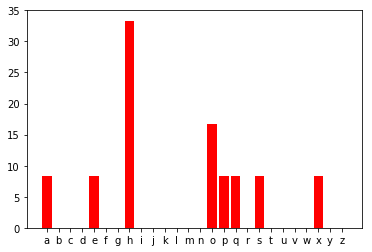

In [20]:
histogramme(crypt)

7. Que pouvez-vous en déduire ?

In [21]:
#Les histogrammes sont les mêmes, les codes encryptés peuvent être trouvé rapidement (26 tentatives max)

8. Faites la cryptanalyse du texte chiffré 'npdeqlntwpopeczfgpcolydnpepipxawp'

In [22]:
def decrypt(s) :
    for i in range(26) :
        print( i,cesar(s,-i))
decrypt('npdeqlntwpopeczfgpcolydnpepipxawp')

0 npdeqlntwpopeczfgpcolydnpepipxawp
1 mocdpkmsvonodbyefobnkxcmodohowzvo
2 lnbcojlrunmncaxdenamjwblncngnvyun
3 kmabnikqtmlmbzwcdmzlivakmbmfmuxtm
4 jlzamhjpslklayvbclykhuzjlaleltwsl
5 ikyzlgiorkjkzxuabkxjgtyikzkdksvrk
6 hjxykfhnqjijywtzajwifsxhjyjcjruqj
7 giwxjegmpihixvsyzivherwgixibiqtpi
8 fhvwidflohghwurxyhugdqvfhwhahpsoh
9 eguvhcekngfgvtqwxgtfcpuegvgzgorng
10 dftugbdjmfefuspvwfsebotdfufyfnqmf
11 cestfaciledetrouverdanscetexemple
12 bdrsezbhkdcdsqntudqczmrbdsdwdlokd
13 acqrdyagjcbcrpmstcpbylqacrcvcknjc
14 zbpqcxzfibabqolrsboaxkpzbqbubjmib
15 yaopbwyehazapnkqranzwjoyapatailha
16 xznoavxdgzyzomjpqzmyvinxzozszhkgz
17 wymnzuwcfyxynliopylxuhmwynyrygjfy
18 vxlmytvbexwxmkhnoxkwtglvxmxqxfiex
19 uwklxsuadwvwljgmnwjvsfkuwlwpwehdw
20 tvjkwrtzcvuvkiflmviurejtvkvovdgcv
21 suijvqsybutujhekluhtqdisujunucfbu
22 rthiuprxatstigdjktgspchrtitmtbeat
23 qsghtoqwzsrshfcijsfrobgqshslsadzs
24 prfgsnpvyrqrgebhireqnafprgrkrzcyr
25 oqefrmouxqpqfdaghqdpmzeoqfqjqybxq


9. Mesurez le temps CPU pris par le programme de cryptanalyse (considérez la commande magique `%%time`)

In [23]:
%%time
decrypt('npdeqlntwpopeczfgpcolydnpepipxawp')

0 npdeqlntwpopeczfgpcolydnpepipxawp
1 mocdpkmsvonodbyefobnkxcmodohowzvo
2 lnbcojlrunmncaxdenamjwblncngnvyun
3 kmabnikqtmlmbzwcdmzlivakmbmfmuxtm
4 jlzamhjpslklayvbclykhuzjlaleltwsl
5 ikyzlgiorkjkzxuabkxjgtyikzkdksvrk
6 hjxykfhnqjijywtzajwifsxhjyjcjruqj
7 giwxjegmpihixvsyzivherwgixibiqtpi
8 fhvwidflohghwurxyhugdqvfhwhahpsoh
9 eguvhcekngfgvtqwxgtfcpuegvgzgorng
10 dftugbdjmfefuspvwfsebotdfufyfnqmf
11 cestfaciledetrouverdanscetexemple
12 bdrsezbhkdcdsqntudqczmrbdsdwdlokd
13 acqrdyagjcbcrpmstcpbylqacrcvcknjc
14 zbpqcxzfibabqolrsboaxkpzbqbubjmib
15 yaopbwyehazapnkqranzwjoyapatailha
16 xznoavxdgzyzomjpqzmyvinxzozszhkgz
17 wymnzuwcfyxynliopylxuhmwynyrygjfy
18 vxlmytvbexwxmkhnoxkwtglvxmxqxfiex
19 uwklxsuadwvwljgmnwjvsfkuwlwpwehdw
20 tvjkwrtzcvuvkiflmviurejtvkvovdgcv
21 suijvqsybutujhekluhtqdisujunucfbu
22 rthiuprxatstigdjktgspchrtitmtbeat
23 qsghtoqwzsrshfcijsfrobgqshslsadzs
24 prfgsnpvyrqrgebhireqnafprgrkrzcyr
25 oqefrmouxqpqfdaghqdpmzeoqfqjqybxq
CPU times: user 3.71 ms, sys: 193 µs, total: 3.9

10. Pour les plus avancés, transformez le chiffrement qui se fait par une addition %26 par une multiplication %26. Attention toutefois, la valeur de la clé doit être inversible dans les entiers modulo 26 (considérez l'algorithme d'Euclide étendu qui donne les coefficients de Bézout).

In [24]:
def gcd_et(a,b):
    d,u,v,d1,u1,v1=a,1,0,b,0,1
    while d1!=0:
        q=d//d1
        d,u,v,d1,u1,v1=d1,u1,v1,d-q*d1,u-q*u1,v-q*v1
    return (u,v,d)


def cesar2(m,k) :
    m = efface(m)
    alphaB = [chr(i) for i in range(ord('a'),ord('z')+1)]
    s = ''
    for c in m :
        index = alphaB.index(c)
        if gcd_et(index,k)[0]!=1 : s = s + c
        else : s = s + alphaB[(index*k)%26]
    return s
cesar2(clair,17)

'cnrqfqbqwvfq'

In [52]:
gcdex(7,10200)

In [31]:
factorint(224)

In [35]:
((2**5)-(2**4))*(7-1)

In [51]:
7*8743%10200

In [37]:
randprime(10**4,10**5)

In [47]:
nextprime(100)*nextprime(101)

In [54]:
(90**7)%10200